In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import sklearn.datasets

C:\Python311\Lib\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
def get_iris_df():
    ds = sklearn.datasets.load_iris()
    df = pd.DataFrame(ds["data"], columns=ds["feature_names"])
    code_species_map = dict(zip(range(3), ds['target_names']))
    df['species'] = [code_species_map[c] for c in ds['target']]
    return df

In [3]:
df = get_iris_df()
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


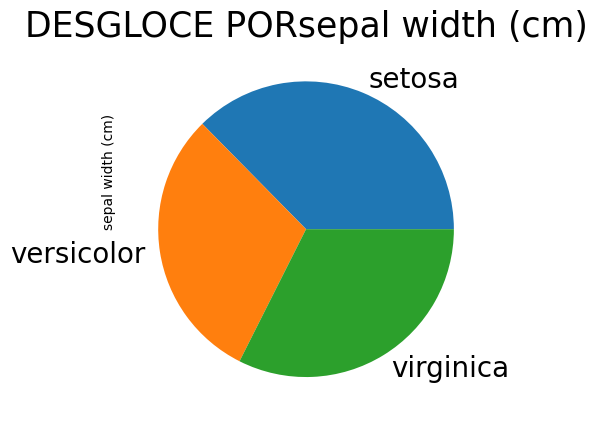

In [4]:
sums_by_species = df.groupby('species').sum()
var = 'sepal width (cm)'
sums_by_species[var].plot(kind='pie', fontsize=20)
plt.ylabel(var, horizontalalignment='left')
plt.title('DESGLOCE POR' + var, fontsize=25)
plt.show()
plt.savefig('grafico_sectores_iris_una_variable.jpg')
plt.close()

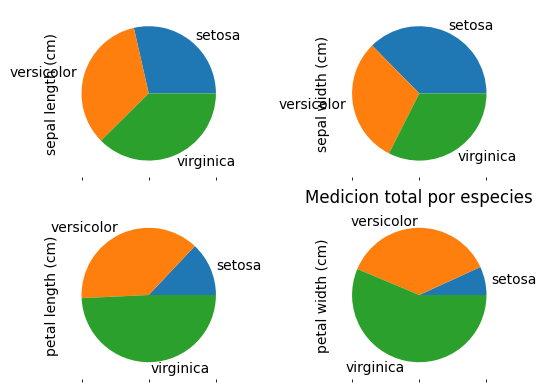

In [5]:
sums_by_species = df.groupby('species').sum()
sums_by_species.plot(kind='pie', subplots= True, layout= (2,2), legend=False)
plt.title('Medicion total por especies')
plt.show()

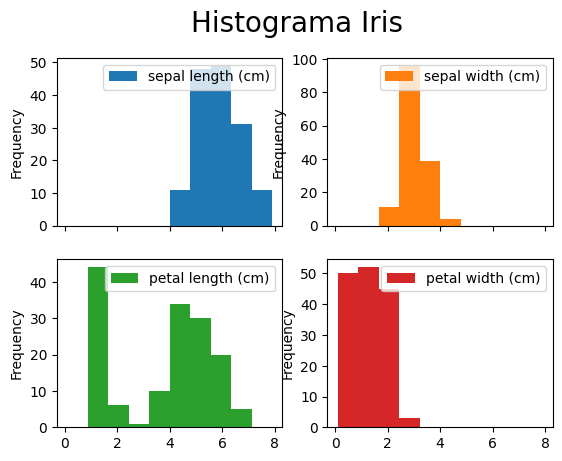

In [6]:
df.plot(kind='hist', subplots=True, layout=(2,2))
plt.suptitle('Histograma Iris', fontsize=20)
plt.show()

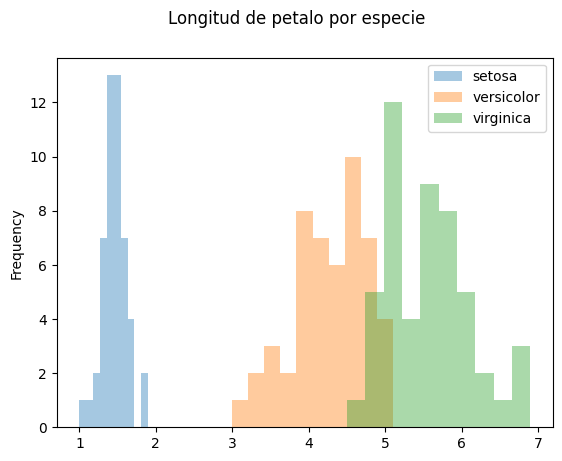

In [7]:
for spec in df['species'].unique():
    forspec = df[df['species'] == spec]
    forspec['petal length (cm)'].plot(kind='hist', alpha=0.4, label=spec)
plt.legend(loc='upper right')
plt.suptitle('Longitud de petalo por especie')
plt.show()

In [8]:
col = df['petal length (cm)']
promedio = col.mean()
std = col.std()
#mediana = col.median()
mediana = col.quantile(0.5)
percentil25=col.quantile(0.25) # Cuartil 1
percentil75 = col.quantile(0.75) # Cuartil 3
print('Promedio: ', promedio)
print('Desviacion Estandar:', std)
print('Mediana: ', mediana)
print('Percentil 25:', percentil25)
print('Percentil 75: ', percentil75)

Promedio:  3.7580000000000005
Desviacion Estandar: 1.7652982332594662
Mediana:  4.35
Percentil 25: 1.6
Percentil 75:  5.1


In [9]:
col = df['petal length (cm)']
percentil25=col.quantile(0.25) # Cuartil 1
percentil75 = col.quantile(0.75) # Cuartil 3
media_limpia = col[(col>percentil25) & (col< percentil75)].mean()

print('Promedio: ', promedio)
print('Promedio limpio:', media_limpia)

Promedio:  3.7580000000000005
Promedio limpio: 4.0984375


## Grafico BOXplot

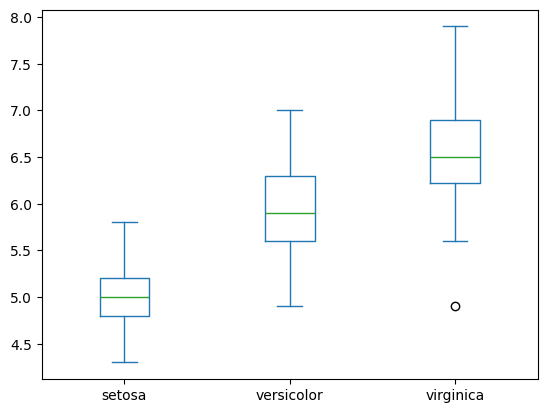

In [10]:
col = 'sepal length (cm)'
df['ind'] = pd.Series(df.index).apply(lambda i: i%50)
df.pivot(index='ind', columns='species')[col].plot(kind='box')
plt.show()

## Scatter

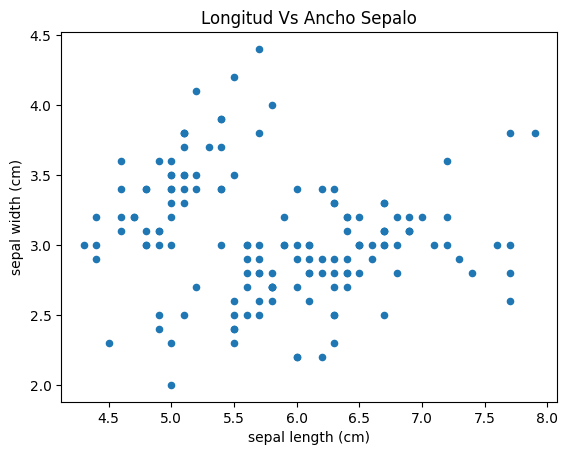

In [11]:
df.plot(kind='scatter', x='sepal length (cm)', y='sepal width (cm)')
plt.title('Longitud Vs Ancho Sepalo')
plt.show()

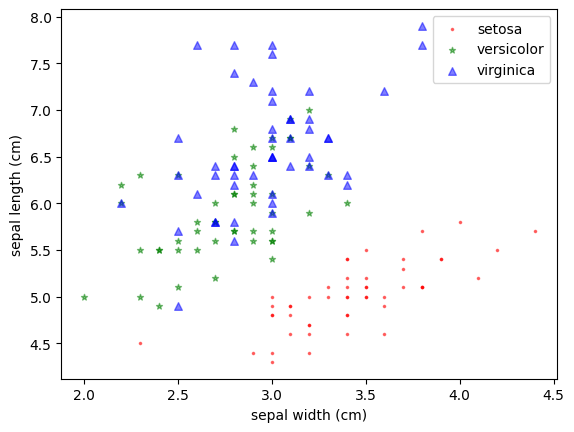

In [12]:
colors = ['r', 'g', 'b']
markers = ['.', '*', '^']
fig, ax1 = plt.subplots(1, 1)
for i, spec in enumerate(df['species'].unique()):
    ddf = df[df['species']== spec]
    ddf.plot(kind='scatter', x='sepal width (cm)', y='sepal length (cm)', alpha=0.5, s=10*(i+1), ax=ax1, color=colors[i], marker= markers[i], label=spec)
plt.legend()
plt.show()

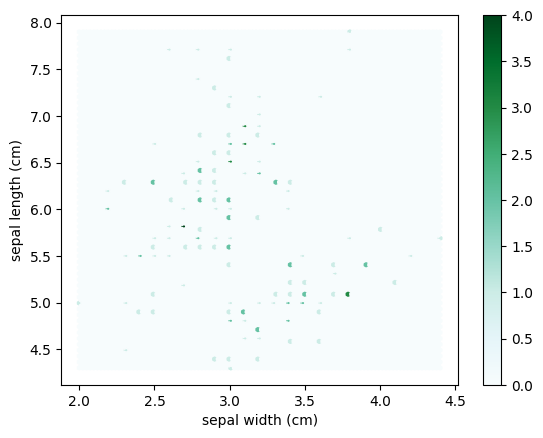

In [13]:
df.plot(kind='hexbin', x='sepal width (cm)', y='sepal length (cm)')
plt.show()

In [15]:
df['sepal width (cm)'].corr(df['sepal length (cm)'], method='pearson')

-0.11756978413300198